In [14]:

### from https://numpy.org/doc/stable/user/tutorial-svd.html

### other references:
# on SVD algebra: https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/
# same guy as ref above has a book: https://www.essentialmathfordatascience.com/


import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from numpy import linalg  # says scipy.linalg doesnt allow operations on n-dimensional arrays, so we use numpy here

img = misc.face()

(768, 1024, 3)
255


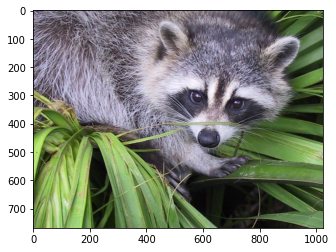

In [12]:
print(img.shape)  # 3rd dimension is for rgb
print(img.max())
plt.imshow(img)  

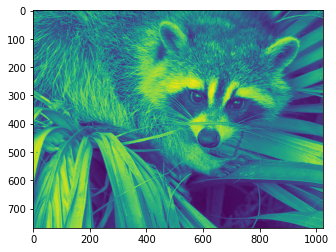

In [11]:
plt.imshow(img[:, :, 1])  # just keeping the green element

(768, 1024)
<class 'numpy.ndarray'>


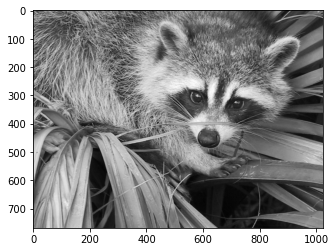

In [33]:
img_scaled = img / 256  # getting all values between 0 and 1
img_gray = img_scaled @ [0.2126, 0.7152, 0.0722]  # documented rgb split to achieve grayscale
print(img_gray.shape)      # now 2d
print(type(img_gray))      # still classed as ndarray
plt.imshow(img_gray, cmap="gray")

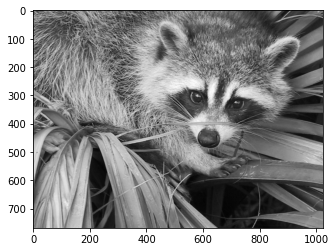

In [31]:
plt.imshow(img_gray*2048, cmap="gray")  # rescaling float values has no impact on plot

In [52]:
# eigendecomposition only works in n*n matrices (same lengths in each dimension): 
# SVD is needed for all other shaped matrices

U, s, Vt = linalg.svd(img_gray)  # decomposing matrix

print(U.shape)
print(s.shape)   
print(Vt.shape)

# populating s values 1024 times over to make matrix ops easier
Sigma = np.zeros((768, 1024))
for i in range(768):
    Sigma[i, i] = s[i]
print(Sigma.shape)


(768, 768)
(768,)
(1024, 1024)
(768, 1024)


[408.81777528  85.22667972  63.3621879   45.67204091  41.80490079
  38.10930273  31.53574625  27.12002236  26.41702022  26.00616864
  23.3333738   21.41518087  17.78677667  17.3115281   16.79986282
  16.20380976  15.42645216  14.82003291  14.05986988  13.9110432 ]


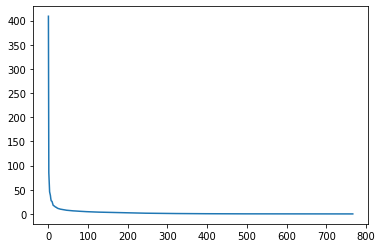

In [60]:
plt.plot(s)  
# s holds the singular values
# think these represent the relative information in each row, similar to eigenvalues in PCA

print(s[:20])  # s is created ordered

(768, 1024)


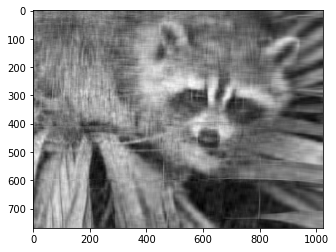

In [70]:
### reconstruct approximation of full matrix

k = 20   # using only  first 20 singular values 
simple_recomposed = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(simple_recomposed, cmap="gray") 
print(simple_recomposed.shape)

1.448599924869577e-12
True
(768, 1024)


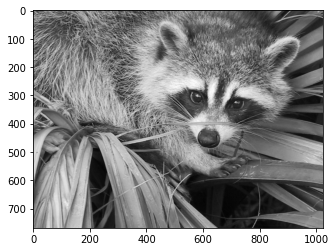

In [57]:
# reconstruct full matrix
recomposed = U @ Sigma @ Vt
print(linalg.norm(img_gray - recomposed))  # metric of differences between two arrays: should be V small if same
print(np.allclose(img_gray, recomposed))  # True if all values in compared arrays are close to each other
print(recomposed.shape)
plt.imshow(recomposed, cmap="gray") 

In [108]:
# decomposing, simplifying and reconstructing all colours
img_reordered_axis =  np.transpose(img, axes=(2, 0 , 1))  # transpose to order for array operations
U, s, Vt = linalg.svd(img_reordered_axis)      # takes a minute if img isnt transposed: <1second if transposed

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 768, 768)
(3, 768)
(3, 1024, 1024)
(3, 768, 1024)
(3, 768, 1024)
(768, 1024, 3)
[129 103  87  93]
[129. 103.  87.  93.]
6.755410342086243e-10
[129 103  87  93]


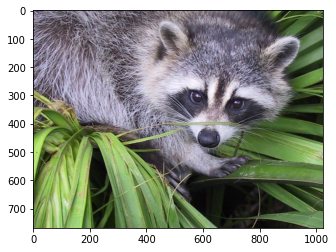

In [127]:
print(U.shape)
print(s.shape)
print(Vt.shape)

Sigma = np.zeros((3, 768, 1024))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])
print(Sigma.shape)

k = 20   # using only  first 20 singular values 
simple_recomposed = U @ Sigma[:, :, :k] @ Vt[:, :k, :] # U @ Sigma[..., :k] @ Vt[:, :k, :] # ellipsis also accepted
full_recomposed = U @ Sigma @ Vt
print(simple_recomposed.shape)


full_recomposed_t = np.transpose(full_recomposed, (1, 2, 0))
print(full_recomposed_t.shape)
plt.imshow(full_recomposed_t)   # shows blank canvas
print(img[:4, 1, 1])
print(full_recomposed_t[:4, 1, 1])
print(linalg.norm(full_recomposed_t - img))  # matrices are the same

full_recomposed_t = np.rint(full_recomposed_t).astype('i2') # converting to integer
print(full_recomposed_t[:4, 1, 1])
plt.imshow(full_recomposed_t)     # now works

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


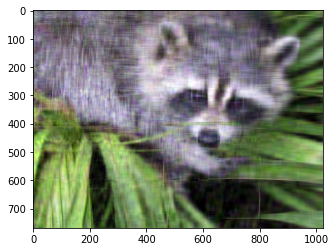

In [130]:
# showing simpler image
simple_recomposed_t = np.transpose(simple_recomposed, (1, 2, 0))
simple_recomposed_t = np.rint(simple_recomposed_t).astype('i2') # converting to integer
plt.imshow(simple_recomposed_t)     

In [38]:
# matrix is orthogonal if AA^T = I    (ref: https://mathworld.wolfram.com/OrthogonalMatrix.html)
# if orthogonal, A^-1 = A^T       where A^-1 means inverse, not x^-1 for all values in the matrix

# norm of a matrix = measure of how large it's component numbers are

array([[ 1.00000000e+00,  4.79348123e-17,  7.17147784e-18],
       [ 4.79348123e-17,  1.00000000e+00, -1.85277946e-16],
       [ 7.17147784e-18, -1.85277946e-16,  1.00000000e+00]])

In [45]:
# make random orthogonal matrix
a = np.random.rand(3, 3)
q, r = np.linalg.qr(a)
q.dot(q.T)   # confirm it is orthogonal

array([[ 1.00000000e+00,  1.85449517e-16,  6.38390481e-17],
       [ 1.85449517e-16,  1.00000000e+00, -3.96871003e-18],
       [ 6.38390481e-17, -3.96871003e-18,  1.00000000e+00]])

In [49]:
# QR decomposition: decompose matrix a into orthogonal matrix q and upper triangular matrix r
print(q.dot(r))
print(a)      
# successful recomposition!

[[0.06346398 0.32596895 0.72683362]
 [0.68594262 0.1893535  0.91477006]
 [0.19387133 0.56595525 0.30009107]]
[[0.06346398 0.32596895 0.72683362]
 [0.68594262 0.1893535  0.91477006]
 [0.19387133 0.56595525 0.30009107]]
